### The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. Four 'Corgie' model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
 

#### 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Veh_df = pd.read_csv("vehicle.csv")

In [3]:
Veh_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [103]:
Veh_df.replace('', np.nan, inplace=True)

In [104]:
Veh_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.340476   32.147711  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.155213    5.613452   47.0   57.00   
max.length_aspect_ratio      846.0    8.111111    2.074801    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.463820   31.029126  130.0  167.00   
scaled_variance.1            844.0  437.966825  174.515158  184.0  318.00   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   71.945962    6.158776   59.0   67.00   
skewness_about               846.0    6.148810    4.572933    0.0    2.00   
skewness_about.1             846.0   12.566864    8.877301    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                                50%     75%    max  
compactness                   93.00  100.00  119.0  
circularity                   44.00   49.00   59.0  
distance_circularity          80.00   98.00  112.0  
radius_ratio                 167.00  194.75  252.0  
pr.axis_aspect_ratio          61.00   65.00   76.0  
max.length_aspect_ratio        8.00   10.00   13.0  
scatter_ratio                157.00  198.00  265.0  
elongatedness                 43.00   46.00   61.0  
pr.axis_rectangularity        20.00   23.00   29.0  
max.length_rectangularity    146.00  159.00  188.0  
scaled_variance              179.00  216.75  288.0  
scaled_variance.1            363.25  586.00  987.0  
scaled_radius_of_gyration    174.00  198.00  268.0  
scaled_radius_of_gyration.1   71.50   75.00   87.0  
skewness_about                 6.00    9.00   19.0  
skewness_about.1              11.00   19.00   40.0  
skewness_about.2             188.00  193.00  206.0  
hollows_ratio                197.00  201.00  211.0

In [105]:
sns.set(style='whitegrid')

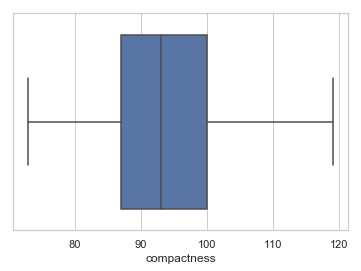

In [106]:
sns.boxplot(x=Veh_df["compactness"])

In [107]:
# No outliers in this column. Check for missing values.
len(Veh_df) - Veh_df["compactness"].count()

0

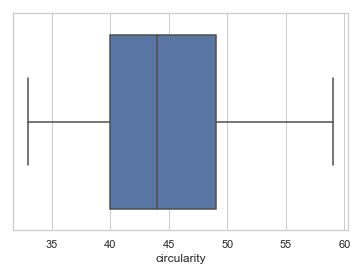

In [108]:
sns.boxplot(x=Veh_df["circularity"])

In [10]:
# No outliers in this 'circularity' column. Check for missing values.
len(Veh_df) - Veh_df["circularity"].count()

5

In [109]:
# Since there are no outliers replace the missing values with mean
Veh_df["circularity"].fillna(Veh_df["circularity"].mean(), inplace=True)

In [110]:
len(Veh_df) - Veh_df["circularity"].count()

0

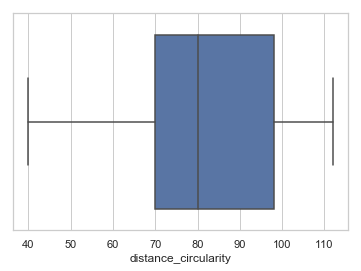

In [13]:
sns.boxplot(x=Veh_df["distance_circularity"])

In [111]:
# Column 'distance_circularity' has no outliers. Check for missing values
Veh_df["distance_circularity"].isnull().sum()

0

In [112]:
# Since there are no outliers replace the missing values with mean
Veh_df["distance_circularity"].fillna(Veh_df["distance_circularity"].mean(), inplace=True)

In [113]:
Veh_df["distance_circularity"].isnull().sum()

0

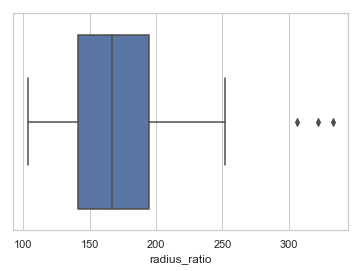

In [17]:
sns.boxplot(x=Veh_df["radius_ratio"])

In [18]:
# Replace outliers with median values
Veh_df["radius_ratio"] = np.where(Veh_df["radius_ratio"] >300.0, Veh_df["radius_ratio"].median(), Veh_df["radius_ratio"] )

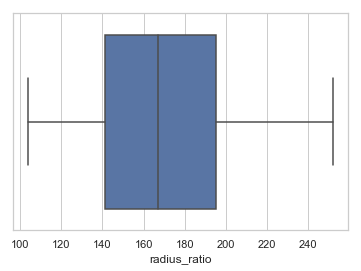

In [19]:
sns.boxplot(x=Veh_df["radius_ratio"])

In [20]:
# Check for missing values
Veh_df["radius_ratio"].isna().sum()

6

In [114]:
# Replace missing values with mean
Veh_df["radius_ratio"].fillna(Veh_df["radius_ratio"].mean(), inplace=True)

In [22]:
Veh_df["radius_ratio"].isna().sum()

0

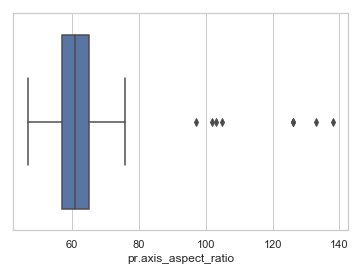

In [23]:
sns.boxplot(x=Veh_df["pr.axis_aspect_ratio"])

In [24]:
# Replace outliers with median values
Veh_df["pr.axis_aspect_ratio"] = np.where(Veh_df["pr.axis_aspect_ratio"] >80.0, Veh_df["pr.axis_aspect_ratio"].median(), Veh_df["pr.axis_aspect_ratio"] )

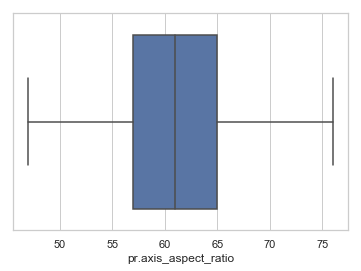

In [25]:
sns.boxplot(x=Veh_df["pr.axis_aspect_ratio"])

In [26]:
# Check for missing values
Veh_df["pr.axis_aspect_ratio"].isna().sum()

2

In [115]:
# Replace missing values with mean
Veh_df["pr.axis_aspect_ratio"].fillna(Veh_df["pr.axis_aspect_ratio"].mean(), inplace=True)

In [28]:
Veh_df["pr.axis_aspect_ratio"].isna().sum()

0

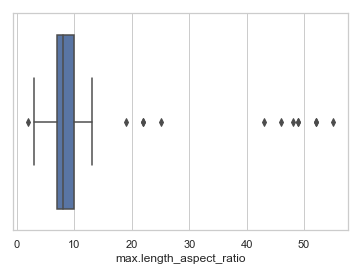

In [29]:
sns.boxplot(x=Veh_df["max.length_aspect_ratio"])

In [30]:
# Replace outliers with median values
Veh_df["max.length_aspect_ratio"] = np.where(Veh_df["max.length_aspect_ratio"] >16, Veh_df["max.length_aspect_ratio"].median(), Veh_df["max.length_aspect_ratio"] )

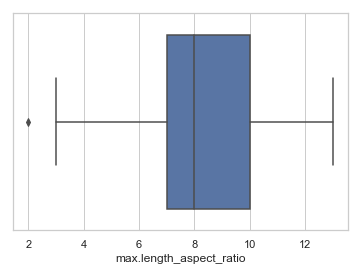

In [31]:
sns.boxplot(x=Veh_df["max.length_aspect_ratio"])

In [32]:
# Check for missing values
Veh_df["max.length_aspect_ratio"].isna().sum()

0

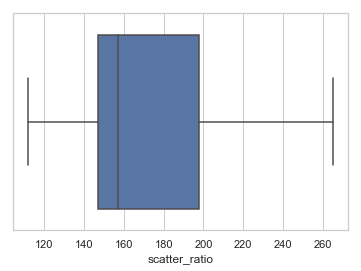

In [33]:
sns.boxplot(x=Veh_df["scatter_ratio"])

In [34]:
# Check for missing values
Veh_df["scatter_ratio"].isna().sum()

1

In [116]:
# No outliers.Replace missing values with mean
Veh_df["scatter_ratio"].fillna(Veh_df["scatter_ratio"].mean(), inplace=True)

In [36]:
Veh_df["scatter_ratio"].isna().sum()

0

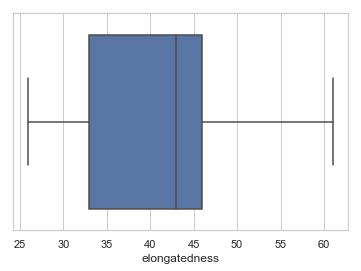

In [37]:
sns.boxplot(x=Veh_df["elongatedness"])

In [38]:
# Check for missing values
Veh_df["elongatedness"].isna().sum()

1

In [117]:
# Replace missing values with mean
Veh_df["elongatedness"].fillna(Veh_df["elongatedness"].mean(), inplace=True)

In [40]:
Veh_df["elongatedness"].isna().sum()

0

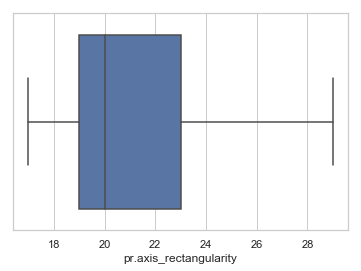

In [41]:
sns.boxplot(x=Veh_df["pr.axis_rectangularity"])

In [42]:
# Check for missing values
Veh_df["pr.axis_rectangularity"].isna().sum()

3

In [118]:
# Replace missing values with mean
Veh_df["pr.axis_rectangularity"].fillna(Veh_df["pr.axis_rectangularity"].mean(), inplace=True)
Veh_df["pr.axis_rectangularity"].isna().sum()

0

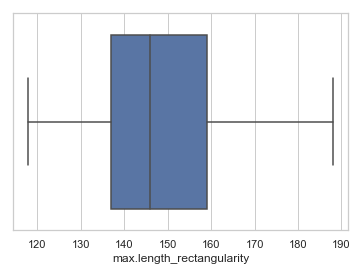

In [44]:
sns.boxplot(x=Veh_df["max.length_rectangularity"])

In [45]:
# Check for missing values
Veh_df["max.length_rectangularity"].isna().sum()

0

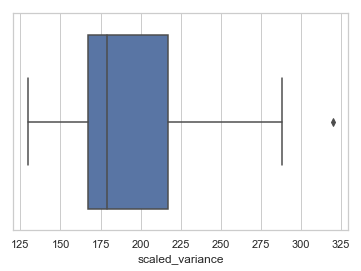

In [46]:
sns.boxplot(x=Veh_df["scaled_variance"])

In [47]:
# Replace outliers with median values
Veh_df["scaled_variance"] = np.where(Veh_df["scaled_variance"] >300.0, Veh_df["scaled_variance"].median(), Veh_df["scaled_variance"] )

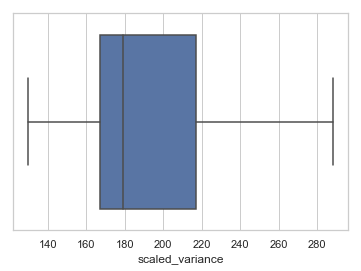

In [48]:
sns.boxplot(x=Veh_df["scaled_variance"])

In [49]:
# Check for missing values
Veh_df["scaled_variance"].isna().sum()

3

In [119]:
# Replace missing values with mean
Veh_df["scaled_variance"].fillna(Veh_df["scaled_variance"].mean(), inplace=True)
Veh_df["scaled_variance"].isna().sum()

0

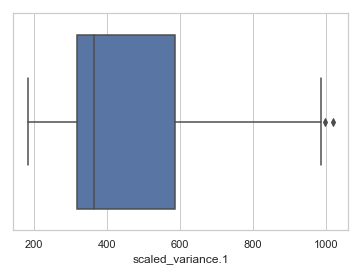

In [51]:
sns.boxplot(x=Veh_df["scaled_variance.1"])

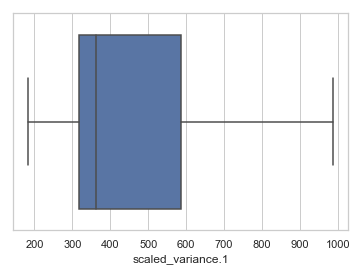

In [52]:
# Replace outliers with median values
Veh_df["scaled_variance.1"] = np.where(Veh_df["scaled_variance.1"] >987, Veh_df["scaled_variance.1"].median(), Veh_df["scaled_variance.1"] )
sns.boxplot(x=Veh_df["scaled_variance.1"])

In [53]:
# Check for missing values
Veh_df["scaled_variance"].isna().sum()

0

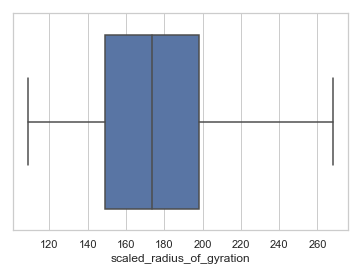

In [54]:
sns.boxplot(x=Veh_df["scaled_radius_of_gyration"])

In [55]:
# Check for missing values
Veh_df["scaled_radius_of_gyration"].isna().sum()

2

In [56]:
# Replace missing values with mean
Veh_df["scaled_radius_of_gyration"].fillna(Veh_df["scaled_radius_of_gyration"].mean(), inplace=True)
Veh_df["scaled_radius_of_gyration"].isna().sum()

0

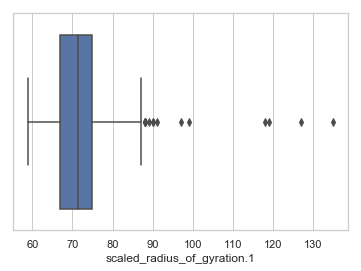

In [57]:
sns.boxplot(x=Veh_df["scaled_radius_of_gyration.1"])

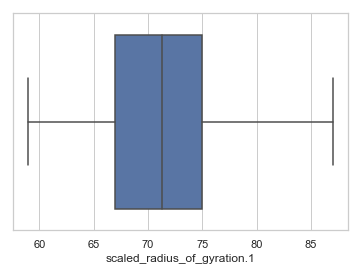

In [58]:
# Replace outliers with median values
Veh_df["scaled_radius_of_gyration.1"] = np.where(Veh_df["scaled_radius_of_gyration.1"] >87, Veh_df["scaled_radius_of_gyration.1"].median(), Veh_df["scaled_radius_of_gyration.1"] )
sns.boxplot(x=Veh_df["scaled_radius_of_gyration.1"])

In [59]:
# Check for missing values
Veh_df["scaled_radius_of_gyration.1"].isna().sum()

4

In [120]:
# Replace missing values with mean
Veh_df["scaled_radius_of_gyration.1"].fillna(Veh_df["scaled_radius_of_gyration.1"].mean(), inplace=True)
Veh_df["scaled_radius_of_gyration.1"].isna().sum()

0

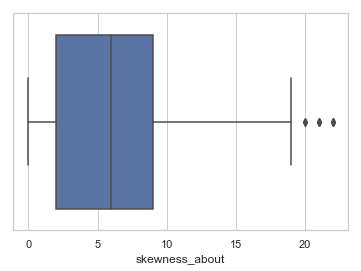

In [61]:
sns.boxplot(x=Veh_df["skewness_about"])

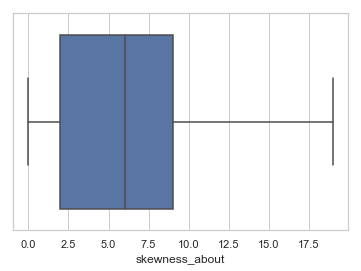

In [62]:
# Replace outliers with median values
Veh_df["skewness_about"] = np.where(Veh_df["skewness_about"] >19, Veh_df["skewness_about"].median(), Veh_df["skewness_about"] )
sns.boxplot(x=Veh_df["skewness_about"])

In [63]:
# Check for missing values
Veh_df["skewness_about"].isna().sum()

6

In [121]:
# Replace missing values with mean
Veh_df["skewness_about"].fillna(Veh_df["skewness_about"].mean(), inplace=True)
Veh_df["skewness_about"].isna().sum()

0

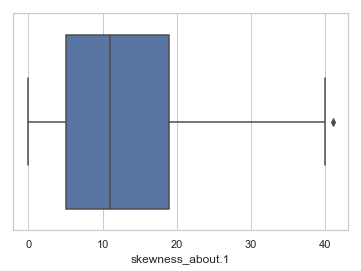

In [65]:
sns.boxplot(x=Veh_df["skewness_about.1"])

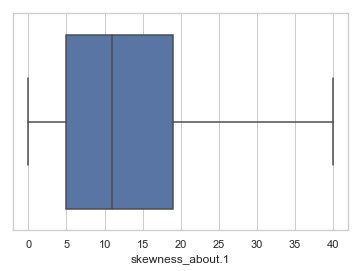

In [66]:
# Replace outliers with median values
Veh_df["skewness_about.1"] = np.where(Veh_df["skewness_about.1"] >40, Veh_df["skewness_about.1"].median(), Veh_df["skewness_about.1"] )
sns.boxplot(x=Veh_df["skewness_about.1"])

In [67]:
# Check for missing values
Veh_df["skewness_about.1"].isna().sum()

1

In [122]:
# Replace missing values with mean
Veh_df["skewness_about.1"].fillna(Veh_df["skewness_about.1"].mean(), inplace=True)
Veh_df["skewness_about.1"].isna().sum()

0

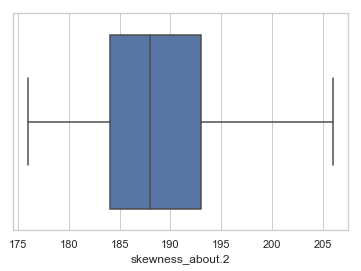

In [69]:
sns.boxplot(x=Veh_df["skewness_about.2"])

In [70]:
# Check for missing values
Veh_df["skewness_about.2"].isna().sum()

1

In [123]:
# Replace missing values with mean
Veh_df["skewness_about.2"].fillna(Veh_df["skewness_about.2"].mean(), inplace=True)
Veh_df["skewness_about.2"].isna().sum()

0

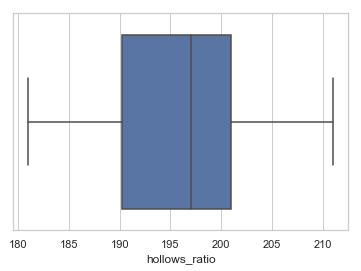

In [72]:
sns.boxplot(x=Veh_df["hollows_ratio"])

In [73]:
# Check for missing values
Veh_df["hollows_ratio"].isna().sum()

0

#### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [124]:
Veh_df['class'] = Veh_df['class'].astype('category')

In [125]:
Veh_df.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio         float64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

In [126]:
Veh_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

C:\Users\vaishnavik\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vaishnavik\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\vaishnavik\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


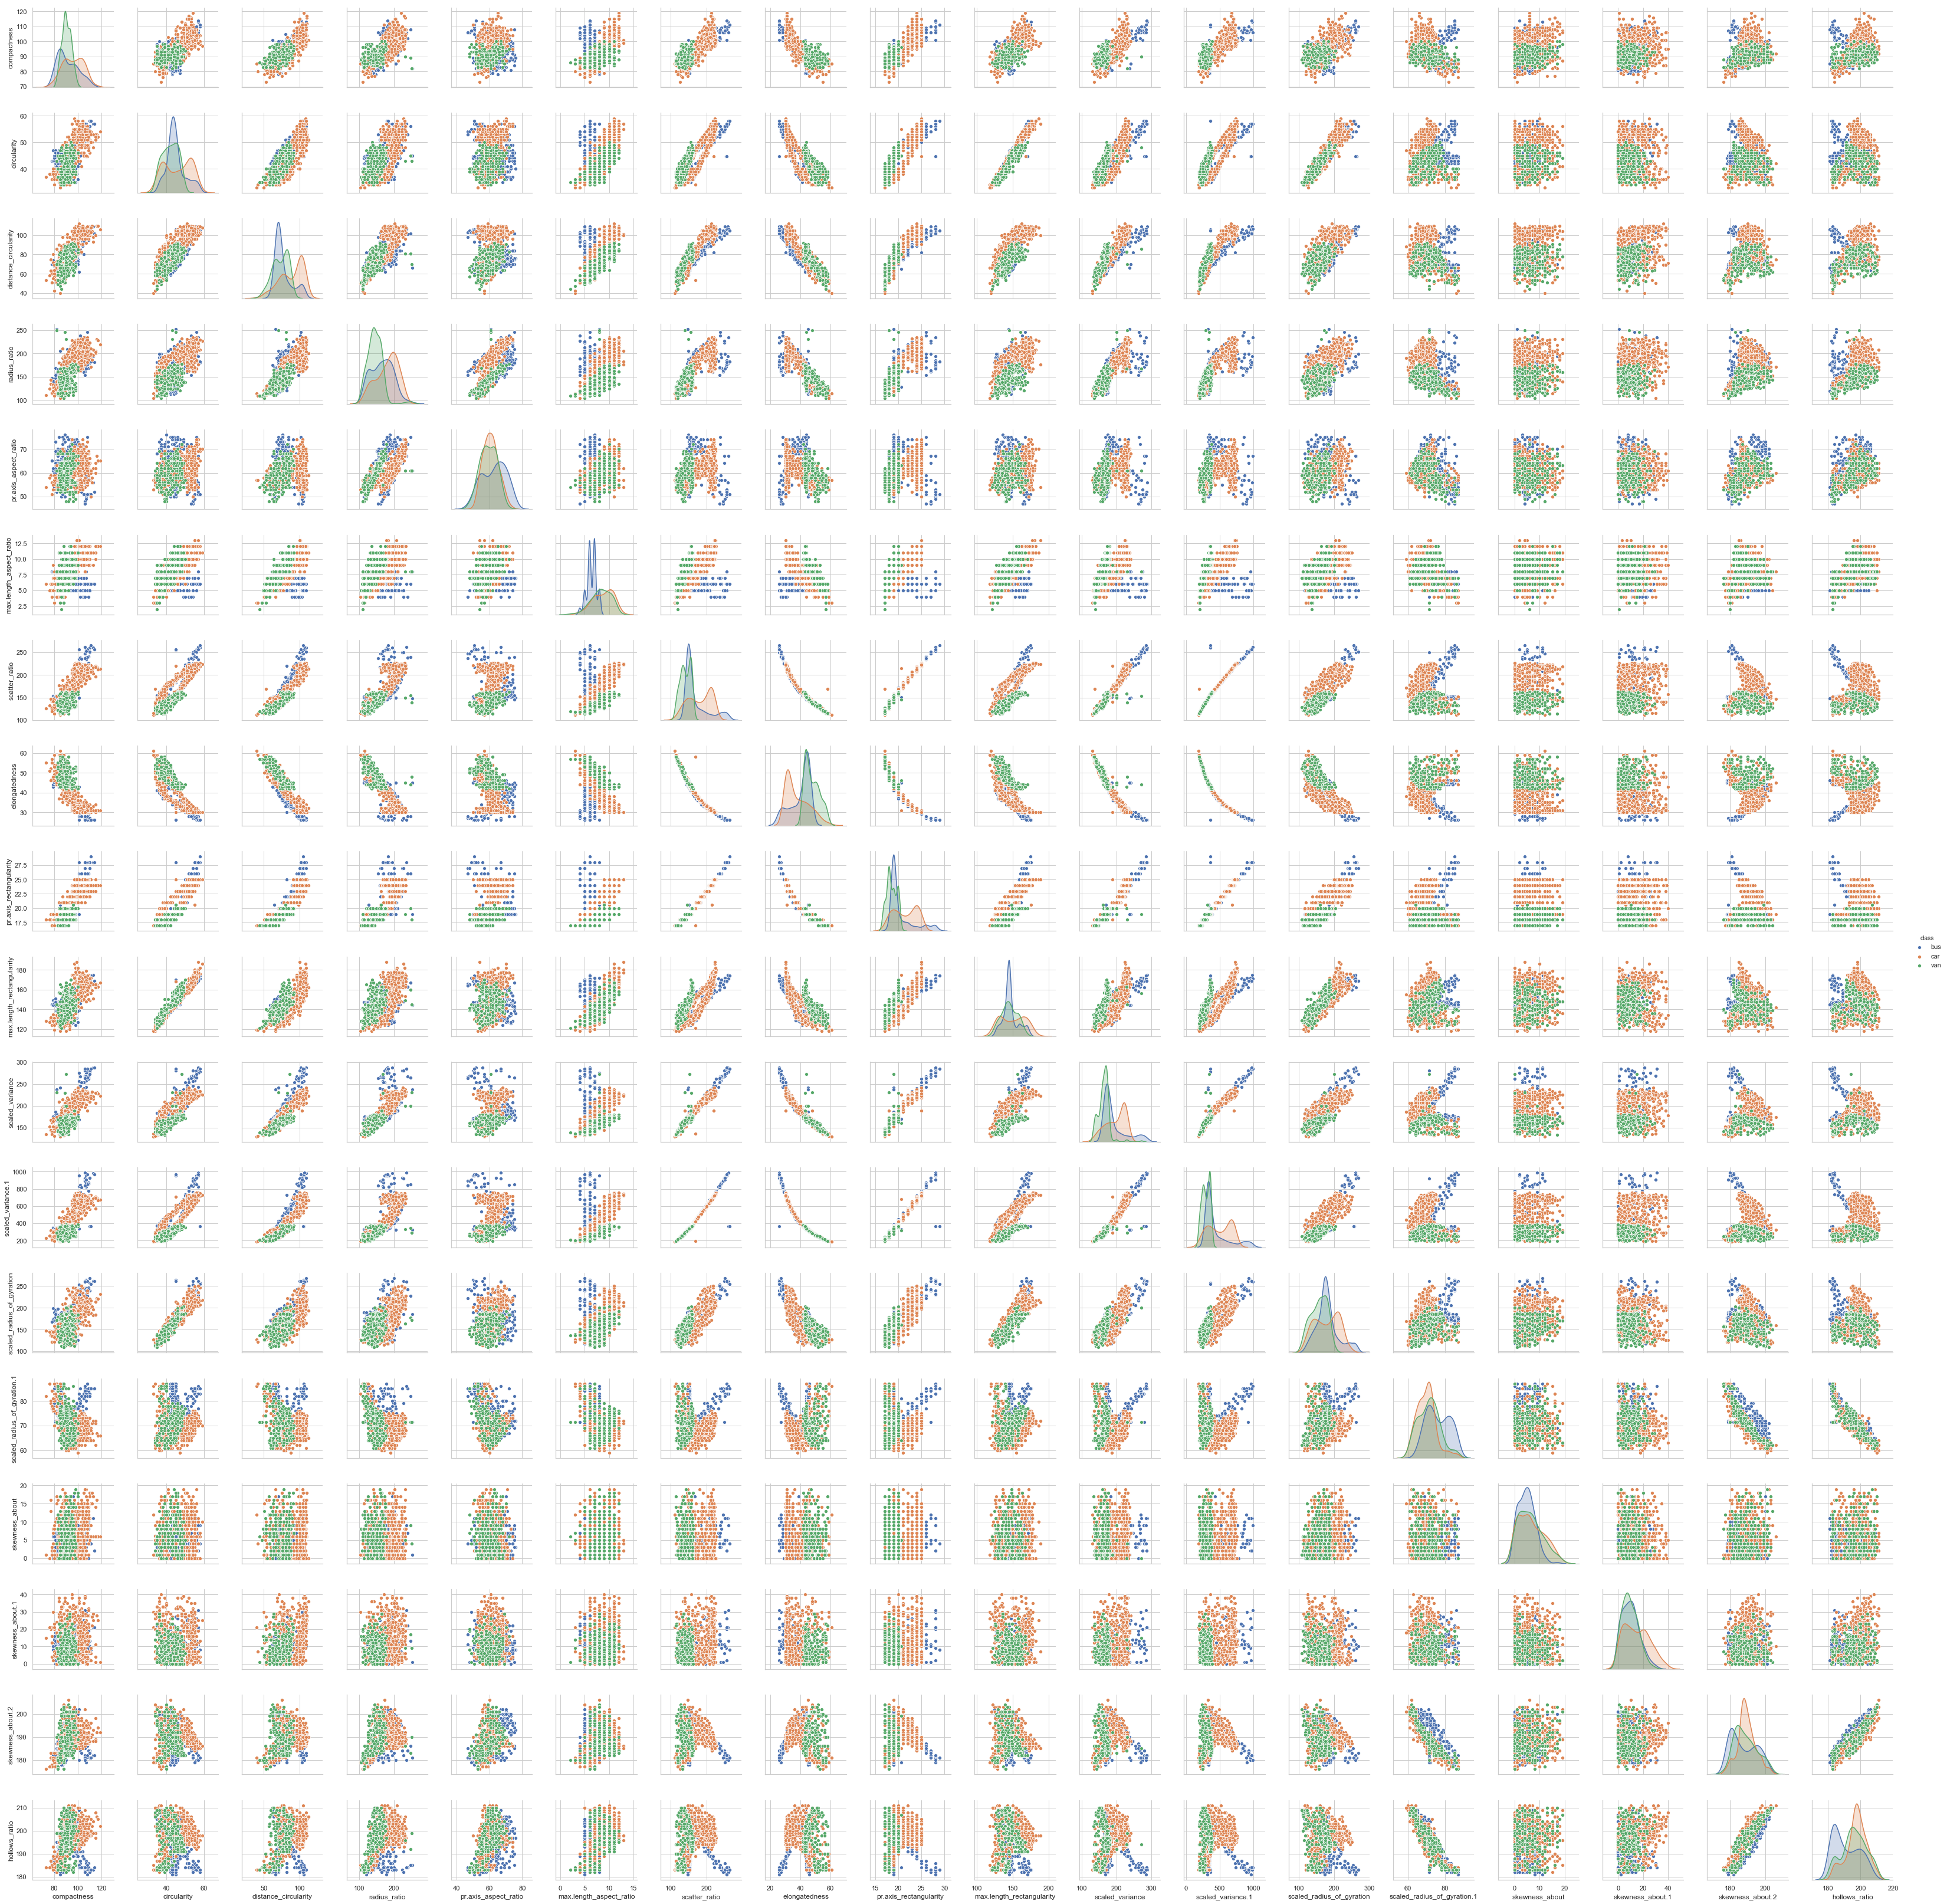

In [127]:
sns.pairplot(Veh_df, hue='class')

In [128]:
## In almost all columns, the peaks for the columns are overlapping.

#### 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

In [182]:
X = Veh_df.drop(labels=['class', 'scaled_variance.1'], axis=1) 
# Dropping scaled_variance.1 column as its creating NaNs in Covariance matrix

In [183]:
Y = Veh_df['class']

In [184]:
from scipy.stats import zscore
X_sd = X.apply(zscore)

In [185]:
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68623251  0.79084412  0.72284977  0.19314696  0.50113637
   0.81319623 -0.78957587  0.81459888  0.67694334  0.7714774   0.58584865
  -0.24724343  0.19736897  0.1568993   0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.63902669  0.20268552  0.56333196
   0.84921058 -0.82287347  0.84597164  0.96308094  0.80424894  0.92798524
   0.06997587  0.13682895 -0.01009024 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.79512697  0.24447972  0.67229365
   0.90547061 -0.91251368  0.89418513  0.77558624  0.87107564  0.70678835
  -0.22919189  0.09938252  0.26265833  0.14573497  0.3324884 ]
 [ 0.72284977  0.63902669  0.79512697  1.00118343  0.65130028  0.46836649
   0.77056657 -0.82661435  0.7448441   0.58034115  0.78769664  0.55150699
  -0.39114266  0.03589974  0.17994532  0.40623136  0.49230466]
 [ 0.19314696  0.20268552  0.24447972  0.65130028  1.00118343  0.15406142
   0.19425649 -0.29862354  0.16281882  0.14783653  0.2079243

In [186]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vals)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[8.85499465e+00 3.33328750e+00 1.17720025e+00 1.13288081e+00
 8.69359874e-01 6.57251023e-01 3.13236673e-01 2.27590445e-01
 1.29524408e-01 7.74337111e-02 7.08105218e-02 5.69415557e-02
 6.43135023e-03 3.84260282e-02 1.88914133e-02 2.55789862e-02
 3.02791469e-02]

Eigenvalues 
[8.85499465e+00 3.33328750e+00 1.17720025e+00 1.13288081e+00
 8.69359874e-01 6.57251023e-01 3.13236673e-01 2.27590445e-01
 1.29524408e-01 7.74337111e-02 7.08105218e-02 5.69415557e-02
 6.43135023e-03 3.84260282e-02 1.88914133e-02 2.55789862e-02
 3.02791469e-02]


In [187]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.02663387  71.61103058  78.52755269  85.18368036  90.2915172
  94.15312973  95.99352042  97.33070527  98.09171295  98.54666697
  98.96270709  99.2972615   99.52302978  99.70093187  99.85121864
  99.96221325 100.        ]


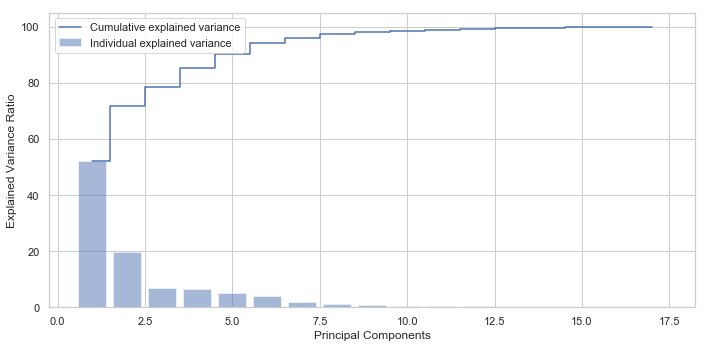

In [188]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [164]:
# Choosing top 7 PCA componencts for 95% coverage

In [189]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:7]

[(8.854994654118457,
  array([-0.28621946, -0.30184131, -0.31794431, -0.28530903, -0.10748973,
         -0.21100082, -0.32284001,  0.32274207, -0.31950426, -0.2926823 ,
         -0.31195473, -0.27507534,  0.05147088, -0.03958343, -0.06076159,
         -0.04579051, -0.09635337])),
 (3.3332874980449647,
  array([-0.07747397,  0.14543505, -0.03455148, -0.18845946, -0.25366365,
         -0.09886028,  0.08590925, -0.0239598 ,  0.09829417,  0.13514722,
          0.08708644,  0.22276668,  0.50260961, -0.01278936, -0.09322552,
         -0.50220502, -0.50521893])),
 (1.1772002483572626,
  array([-0.03408987, -0.18184262,  0.08116494,  0.05458149, -0.07407915,
         -0.10287445,  0.11669019, -0.09710337,  0.11396661, -0.18829825,
          0.14901054, -0.18974018,  0.07197161, -0.56696333,  0.68982398,
         -0.08015658, -0.03909081])),
 (1.1328808056957298,
  array([-0.13969106,  0.03367228, -0.10636983,  0.25556661,  0.61051282,
         -0.27570725, -0.00257027, -0.0676247 , -0.02781294

In [190]:
w = np.hstack((eigen_pairs[0][1].reshape(17,1), 
                      eigen_pairs[1][1].reshape(17,1),
                      eigen_pairs[2][1].reshape(17,1),
                      eigen_pairs[3][1].reshape(17,1),
                      eigen_pairs[4][1].reshape(17,1),
                      eigen_pairs[5][1].reshape(17,1),
                      eigen_pairs[6][1].reshape(17,1)))
print('Matrix W:\n', w)

Matrix W:
 [[-0.28621946 -0.07747397 -0.03408987 -0.13969106  0.13698156 -0.28573276
  -0.22580434]
 [-0.30184131  0.14543505 -0.18184262  0.03367228 -0.13200895  0.06589145
   0.38751854]
 [-0.31794431 -0.03455148  0.08116494 -0.10636983 -0.06624375  0.00775412
  -0.17918519]
 [-0.28530903 -0.18845946  0.05458149  0.25556661  0.15579013  0.11911639
  -0.17041552]
 [-0.10748973 -0.25366365 -0.07407915  0.61051282  0.15132993  0.57572004
  -0.08071695]
 [-0.21100082 -0.09886028 -0.10287445 -0.27570725 -0.62889751  0.3296115
  -0.38749398]
 [-0.32284001  0.08590925  0.11669019 -0.00257027  0.10054913 -0.11828858
  -0.10328097]
 [ 0.32274207 -0.0239598  -0.09710337 -0.0676247  -0.09336663  0.09495348
   0.11869904]
 [-0.31950426  0.09829417  0.11396661 -0.02781294  0.09471511 -0.12645665
  -0.10174538]
 [-0.2926823   0.13514722 -0.18829825 -0.04544313 -0.24857444  0.08292825
   0.35220163]
 [-0.31195473  0.08708644  0.14901054  0.06751293  0.1654264  -0.16169504
  -0.08639639]
 [-0.275075

In [191]:
X_sd_pca = X_sd.dot(w)

In [192]:
X_sd.shape,w.shape, X_sd_pca.shape

((846, 17), (17, 7), (846, 7))

#### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. 

In [198]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sd_pca, Y, test_size=0.20, random_state=1)

In [203]:
for c in [0.01,0.05, 0.5, 1]:
    num_folds = 50
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed)
    model = SVC(kernel='linear', C=c)
    results = cross_val_score(model, X_train, Y_train, cv=kfold)
    #print(results)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 81.451% (10.093%)
Accuracy: 83.165% (9.274%)
Accuracy: 83.473% (9.096%)
Accuracy: 83.901% (8.738%)


In [205]:
for c in [0.01,0.05, 0.5, 1]:
    num_folds = 50
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed)
    model = SVC(kernel='rbf', C=c, gamma='auto')
    results = cross_val_score(model, X_train, Y_train, cv=kfold)
    #print(results)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 50.055% (13.667%)
Accuracy: 69.989% (13.786%)
Accuracy: 90.912% (8.362%)
Accuracy: 91.956% (6.591%)


In [206]:
# Choosing the following hyper parameters for SVC
# kernel = 'rbf'
# C = 1

In [210]:
svclassifier = SVC(kernel='rbf', C = 1, gamma='auto')  
final = svclassifier.fit(X_train, y_train)  

In [211]:
y_pred = svclassifier.predict(X_test)  

In [212]:
final.score(X_test , y_test) 

0.5411764705882353